In [1]:
import numpy as np

from qiskit import *

# Quantum Swamp

This is a traveling salesman problem.

In [2]:
N = 4
cost_matrix = np.ones((N,N))
cost_matrix[0,2] = cost_matrix[2,0] = 2
cost_matrix[3,1] = cost_matrix[1,3] = 3

cost_matrix

array([[1., 1., 2., 1.],
       [1., 1., 1., 3.],
       [2., 1., 1., 1.],
       [1., 3., 1., 1.]])

In [3]:
B = np.exp(1j *cost_matrix)
B

array([[ 0.54030231+0.84147098j,  0.54030231+0.84147098j,
        -0.41614684+0.90929743j,  0.54030231+0.84147098j],
       [ 0.54030231+0.84147098j,  0.54030231+0.84147098j,
         0.54030231+0.84147098j, -0.9899925 +0.14112001j],
       [-0.41614684+0.90929743j,  0.54030231+0.84147098j,
         0.54030231+0.84147098j,  0.54030231+0.84147098j],
       [ 0.54030231+0.84147098j, -0.9899925 +0.14112001j,
         0.54030231+0.84147098j,  0.54030231+0.84147098j]])

In [4]:
U = []

for j in range(N):
    Uj = np.zeros((N,N), dtype=np.complex)
    for k in range(N):
        Uj[k,k] = B[j,k]
    Uj = Uj

    U.append(Uj)

kron = U[0]
for i in range(1, N):
    kron = np.kron(kron, U[i])

print(U)

np.count_nonzero(kron - np.diag(np.diagonal(kron)))

[array([[ 0.54030231+0.84147098j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.54030231+0.84147098j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.41614684+0.90929743j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.54030231+0.84147098j]]), array([[ 0.54030231+0.84147098j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.54030231+0.84147098j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.54030231+0.84147098j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.9899925 +0.14112001j]]), array([[-0.41614684+0.90929743j,  0.        +0.j        ,
 

0

In [5]:
t = 6
s = 8

In [6]:
def uni_gate(phases, x,y,z, name):
    a,b,c,d = phases
    ug = QuantumCircuit(3, name=name)
    ug.cu1((c-a), x,y)
    ug.u1(a, x)
    ug.cu1(b-a, x,z)
    ug.ccx(x,y,z)
    ug.cu1((d-c+a-b)/2, x,z)
    #ug.u1((d-c+a-b)/2, z)
    # ug.ccx(x,y,z)
    ug.ccx(x,y,z)
    ug.cu1((d-c+a-b)/2, x,y)
    ug.cu1((d-c+a-b)/2, x,z)
    return ug.to_instruction()


In [7]:
def qft_dagger(n):
    circ = QuantumCircuit(n, name='I-QFT')
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circ.cu1(-np.pi/float(2**(k-m)), k, m)
        circ.h(k)
    return circ.to_instruction()

In [8]:
test_phases = [0, np.pi/2 , np.pi /8 , np.pi /4 , np.pi /2 , 0, np.pi /4 , np.pi /4 , np.pi /8 , np.pi /4 , 0, np.pi /8 , np.pi /4 , np.pi /4 , np.pi /8, 0]

In [9]:
(np.pi/4 + np.pi/8 - 0 - np.pi/2)/2, np.pi/16

(-0.19634954084936207, 0.19634954084936207)

In [21]:
qc = QuantumCircuit(t+s,t)

temp = [0, 1, 5, 6]
#temp = [1, 2, 4, 5]
#temp = [0, 4, 5, 7]
#temp = [1, 2, 3, 6]
#temp = [0, 1, 2, 7]
#temp = [0, 2, 3, 5]





for te in temp:
    qc.x(t+te)

for t_i in range(t):
    qc.h(t_i)

for t_i in range(t-1, -1, -1):
    bigU_qc = QuantumCircuit(t+s, name='C-U'.format(2**(t-t_i-1)))
    for idx, u in enumerate(U):
        phases = (1j *np.log(np.diag(u))).real
        #phases = test_phases[idx*4 : idx*4 + 4]
        # print(idx, (t-t_i-1)*4)
        print(phases)
        gate = uni_gate(phases, 0,1,2, name='uni-{}'.format(idx))
        #for power in range(2**(t-t_i-1)):
        #    print(power)
        bigU_qc.append(gate, [t_i,idx*2+t,idx*2+t+1])
    bigU_qc_2 = QuantumCircuit(t+s, name='C-U-pow(2,{})'.format(2**(t-t_i-1)))
    for power in range(2**(t-t_i-1)):
        bigU_qc_2.append(bigU_qc, range(t+s))
    qc.append(bigU_qc_2, range(t+s))
    qc.barrier()
        
    #qc.append(bigU_qc.to_instruction(), range(t+s))

# qft_dagger(qc, t)
qc.append(qft_dagger(t), range(t))

for t_i in range(t):
    qc.measure(t_i, t_i)

[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]
[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]
[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]
[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]
[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]
[-1. -1. -2. -1.]
[-1. -1. -1. -3.]
[-2. -1. -1. -1.]
[-1. -3. -1. -1.]


In [29]:
qc.draw(line_length=250)

/cise/homes/dvolya/.local/lib/python3.6/site-packages/qiskit/circuit/quantumcircuit.py:861: DeprecationWarning: The parameter "line_length" is being replaced by "fold"
  ax=ax)


In [12]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

100001


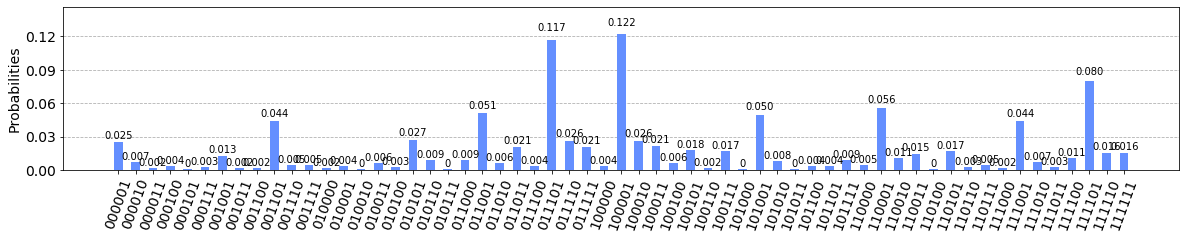

In [13]:
from qiskit.visualization import plot_histogram

counts = result.get_counts()

max_key = max(counts, key=counts.get)
print(max_key)
plot_histogram(result.get_counts(), figsize=(20,3))

In [14]:
qc = QuantumCircuit(t+s,t)

for t_i in range(t-1, -1, -1):
    bigU_qc = QuantumCircuit(t+s, name='C-U'.format(2**(t-t_i-1)))
    for idx, u in enumerate(U):
        #phases = (1j *np.log(np.diag(u))).real
        phases = test_phases[idx*4 : idx*4 + 4]
        # print(idx, (t-t_i-1)*4)
        print(phases)
        gate = uni_gate(phases, 0,1,2, name='uni-{}'.format(idx))
        #for power in range(2**(t-t_i-1)):
        #    print(power)
        bigU_qc.append(gate, [t_i,idx*2+t,idx*2+t+1])
    #for power in range(2**(t-t_i-1)):
    #    qc.append(bigU_qc, range(t+s))
    qc.barrier()

[0, 1.5707963267948966, 0.39269908169872414, 0.7853981633974483]
[1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483]
[0.39269908169872414, 0.7853981633974483, 0, 0.39269908169872414]
[0.7853981633974483, 0.7853981633974483, 0.39269908169872414, 0]
[0, 1.5707963267948966, 0.39269908169872414, 0.7853981633974483]
[1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483]
[0.39269908169872414, 0.7853981633974483, 0, 0.39269908169872414]
[0.7853981633974483, 0.7853981633974483, 0.39269908169872414, 0]
[0, 1.5707963267948966, 0.39269908169872414, 0.7853981633974483]
[1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483]
[0.39269908169872414, 0.7853981633974483, 0, 0.39269908169872414]
[0.7853981633974483, 0.7853981633974483, 0.39269908169872414, 0]
[0, 1.5707963267948966, 0.39269908169872414, 0.7853981633974483]
[1.5707963267948966, 0, 0.7853981633974483, 0.7853981633974483]
[0.39269908169872414, 0.7853981633974483, 0, 0.39269908169872414]
[0.7853981633974483, 0.78